In [1]:
from pathlib import Path
from json import loads
import matplotlib.pyplot as plt
import subprocess
import os

In [2]:
os.chdir('/home/kye/Documents/projects_/backjack_lw/sims')
print(os.getcwd())

/home/kye/Documents/projects_/backjack_lw/sims


In [46]:
decks = 1
sims = 1
pen = 1
output = f'rcount_dist_results_{decks}_{sims}_{int(pen*100)}' 
sim_path = 'count_distribution.py'

#Run the simulation. 
subprocess.run(
        ['python',
        sim_path,
        f'-d {decks}',
        f'-s {sims}',
        f'-o {output}',
        f'-p {pen}']
    )

CompletedProcess(args=['python', 'count_distribution.py', '-d 1', '-s 1', '-o rcount_dist_results_1_1_100', '-p 1'], returncode=0)

In [47]:
def dict_combine(iterable):
    #Takes a list of dictionaries and combines the key values into one dictionary.
    result_dict = {}
    for d in iterable:
        for key, value in d.items():
            try:
                result_dict[key] += value
            except KeyError:
                result_dict[key] = value
    return result_dict

In [48]:
#read data from results file and prepare.
data = [] 

path = Path(os.getcwd() + f'/results/{output}')
with open(path,'r') as fh:
    for line in fh:
        data.append(
                loads(line)
                    )

data_ready = dict_combine(data)


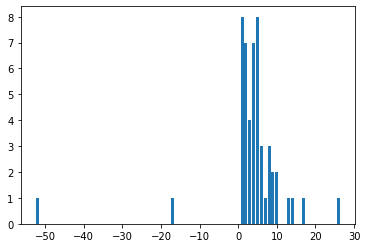

In [49]:

plt.bar(
 list(map(int, data_ready.keys())),
 list(map(lambda x:x ,data_ready.values()))
)
plt.show()

In [50]:
sum(data_ready.values())

51